In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
from pathlib import Path
from shapely.geometry import Point

In [2]:
# Download the Nairobi street network
# from OpenStreetMap using OSMnx
nairobi_graph = ox.graph_from_place("Nairobi, Kenya", network_type="all")

In [3]:
nairobi_graph

In [4]:
type(nairobi_graph)

networkx.classes.multidigraph.MultiDiGraph

A graph data structure with directed, possibly multiple edgesâ€”ideal for modeling roads

networkx: The Python library for graph theory and network analysis.
MultiDiGraph = Multi + Directed + Graph
- Graph
A structure of nodes and edges (e.g., intersections and roads)
- Directed
Each edge has a direction (like a one-way street)
- Multi
You can have multiple edges between two nodes (e.g., two parallel roads)


In [5]:
# View one edge
u, v, k, data = list(nairobi_graph.edges(keys=True, data=True))[0]
print(f"Edge from {u} to {v} (key={k})")
print(data)

Edge from 29780021 to 280701730 (key=0)
{'osmid': 663223989, 'highway': 'secondary', 'name': 'Airport South Road', 'oneway': True, 'ref': 'B10E', 'reversed': False, 'length': np.float64(201.71277800907748), 'geometry': <LINESTRING (36.904 -1.347, 36.904 -1.347, 36.903 -1.347, 36.903 -1.347, 36....>}


In [6]:
# Convert the graph to a GeoDataFrame
edges, nodes = ox.graph_to_gdfs(nairobi_graph)

In [7]:
type(edges), type(nodes)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [8]:
edges.head()

,y,x,street_count,highway,ref,junction,railway,geometry
osmid,,,,,,,,
29780021,-1.347361,36.903720,4,NaN,NaN,NaN,NaN,POINT (36.90372 -1.34736)
29780039,-1.344646,36.914422,3,NaN,NaN,NaN,NaN,POINT (36.91442 -1.34465)
29780051,-1.347919,36.909213,3,motorway_junction,23-D,NaN,NaN,POINT (36.90921 -1.34792)
30030168,-1.289755,36.798038,4,NaN,NaN,NaN,NaN,POINT (36.79804 -1.28975)
30030169,-1.290804,36.798552,3,NaN,NaN,NaN,NaN,POINT (36.79855 -1.2908)


In [9]:
edges.columns

Index(['y', 'x', 'street_count', 'highway', 'ref', 'junction', 'railway',
       'geometry'],
      dtype='object')

In [10]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

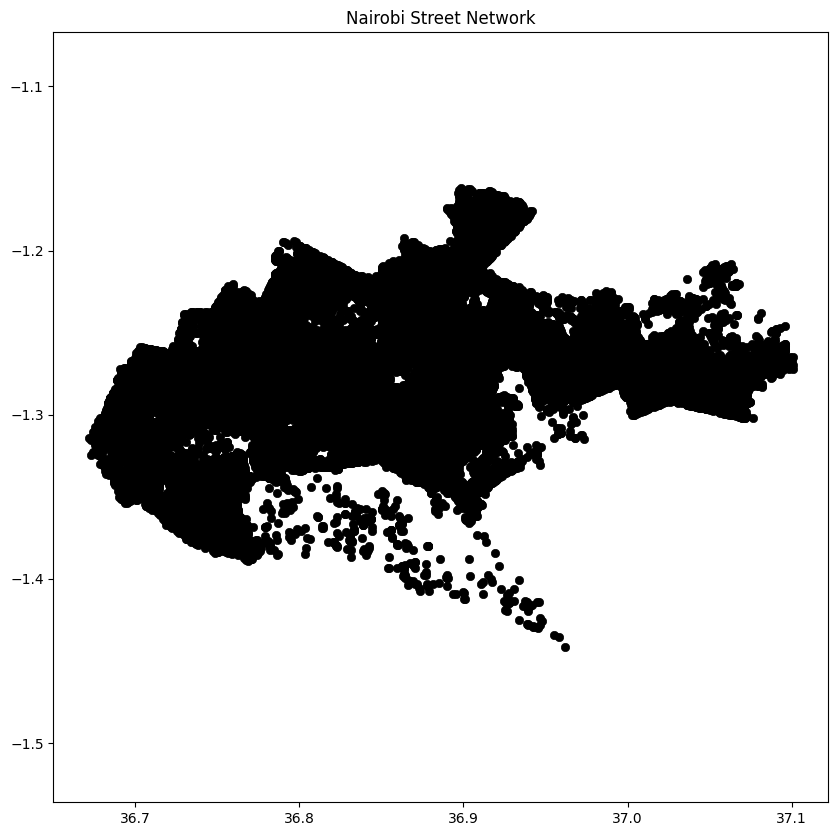

In [11]:
# Plot the street network
edges.plot(figsize=(10, 10), linewidth=0.5, color="black")
plt.title("Nairobi Street Network")
plt.axis("equal")
plt.show()

In [12]:
# Save the street network to a shapefile
edges.to_file("../data/nairobi_street_network.shp")

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_8176/3737016717.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  edges.to_file("../data/nairobi_street_network.shp")
/Users/dquispe/Documents/repositories/intro_geospatial_data/.venv/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


In [13]:
# Practice with CRS
print("Original CRS:", edges.crs)

Original CRS: epsg:4326


In [15]:
# Reproject to a different CRS
nairobi_edges = edges.to_crs(epsg=32637)  # UTM zone 37N
print("Reprojected CRS:", nairobi_edges.crs)

Reprojected CRS: EPSG:32637


In [16]:
# saved to shapefile
nairobi_edges.to_file("../data/nairobi_street_network_reprojected_32637.shp")

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_8176/1839469791.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nairobi_edges.to_file("../data/nairobi_street_network_reprojected_32637.shp")
/Users/dquispe/Documents/repositories/intro_geospatial_data/.venv/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


In [24]:
# Add a centroid and add a 3 km radius buffer
city_boundary = edges.unary_union.convex_hull

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_8176/2341992735.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  city_boundary = edges.unary_union.convex_hull


In [25]:
type(city_boundary)

shapely.geometry.polygon.Polygon

In [26]:
# Create a centroid
centroid = city_boundary.centroid

In [34]:
print(centroid)

POINT (36.88988302424088 -1.295393050314882)


In [28]:
type(centroid)

shapely.geometry.point.Point

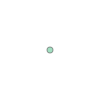

In [33]:
centroid

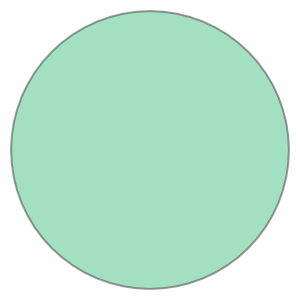

In [29]:
# Create a buffer around the centroid
buffer = centroid.buffer(3000)  # 3 km buffer
buffer

In [30]:
type(buffer)

shapely.geometry.polygon.Polygon

In [31]:
gdf_centroid = gpd.GeoDataFrame(geometry=[centroid], crs=edges.crs)

In [32]:
gdf_centroid

,geometry
0,POINT (36.88988 -1.29539)


In [35]:
gdf_buffer = gpd.GeoDataFrame(geometry=[buffer], crs=edges.crs)

In [36]:
gdf_buffer

,geometry
0,"POLYGON ((3036.88988 -1.29539, 3022.44406 -295..."


In [39]:
# Count the number of edges within the buffer
edges_within_buffer = edges[edges.intersects(buffer)]
edges_within_buffer

,y,x,street_count,highway,ref,junction,railway,geometry
osmid,,,,,,,,
29780021,-1.347361,36.903720,4,NaN,NaN,NaN,NaN,POINT (36.90372 -1.34736)
29780039,-1.344646,36.914422,3,NaN,NaN,NaN,NaN,POINT (36.91442 -1.34465)
29780051,-1.347919,36.909213,3,motorway_junction,23-D,NaN,NaN,POINT (36.90921 -1.34792)
30030168,-1.289755,36.798038,4,NaN,NaN,NaN,NaN,POINT (36.79804 -1.28975)
30030169,-1.290804,36.798552,3,NaN,NaN,NaN,NaN,POINT (36.79855 -1.2908)
...,...,...,...,...,...,...,...,...
12740081569,-1.264256,36.820245,1,NaN,NaN,NaN,NaN,POINT (36.82025 -1.26426)
12740081663,-1.264983,36.821442,1,NaN,NaN,NaN,NaN,POINT (36.82144 -1.26498)
12740081665,-1.264711,36.821604,1,NaN,NaN,NaN,NaN,POINT (36.8216 -1.26471)


In [41]:
# count the number of elements in the edges_within_buffer
num_edges_within_buffer = len(edges_within_buffer)
print(f"Number of edges within the buffer: {num_edges_within_buffer}")

Number of edges within the buffer: 73982


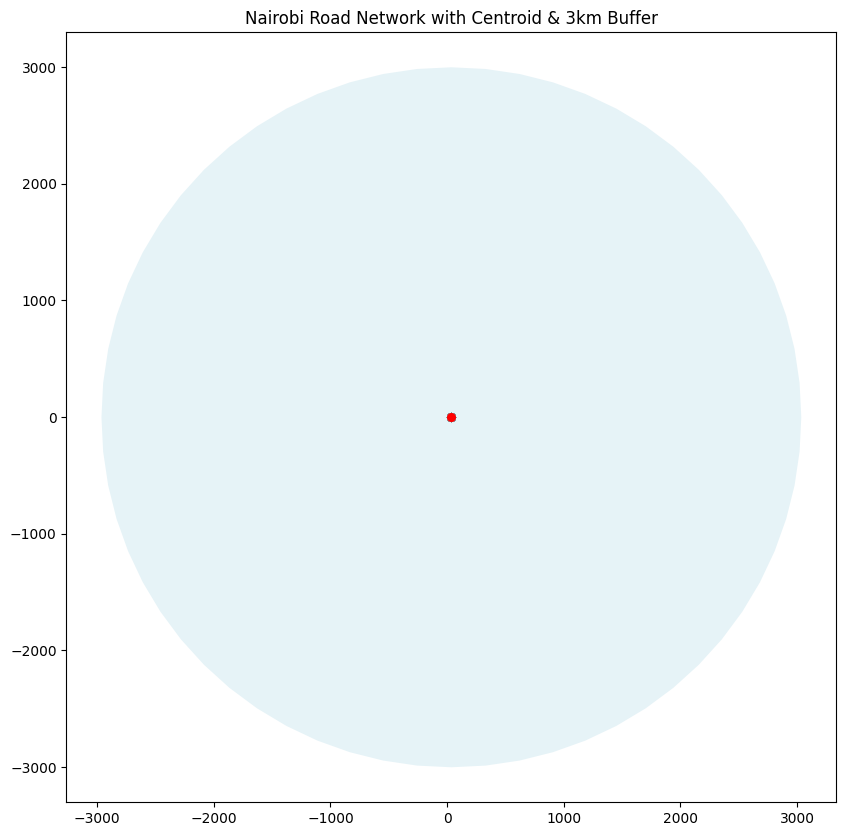

In [42]:
# Plot everything
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, color='gray', linewidth=0.5)
gdf_buffer.plot(ax=ax, color='lightblue', alpha=0.3)
gdf_centroid.plot(ax=ax, color='red', markersize=30)
plt.title("Nairobi Road Network with Centroid & 3km Buffer")
plt.show()